In [30]:
import logging
import sys
sys.path.append('/remote/gpu02/crescenzo/MadMiner')
from madminer.sampling import combine_and_shuffle
from madminer.core import MadMiner
from madminer.ml import MorphParameterizedRatioEstimator
from madminer.sampling import SampleAugmenter
from madminer import sampling
from madminer.utils.interfaces import _load_samples

In [31]:
# MadMiner output
logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [32]:
models = []
for j in range(1,6):
    ## Dumb rearrangement
    nn = MorphParameterizedRatioEstimator()
    nn.load(f"alice_models/benchmark_model_{j}")
    models.append(nn)

16:17 madminer.ml.base     INFO    Loading model from alice_models/benchmark_model_1
16:17 madminer.ml.base     WARNING Parameter scaling information not found in alice_models/benchmark_model_1
16:17 madminer.ml.base     INFO    Loading model from alice_models/benchmark_model_2
16:17 madminer.ml.base     WARNING Parameter scaling information not found in alice_models/benchmark_model_2
16:17 madminer.ml.base     INFO    Loading model from alice_models/benchmark_model_3
16:17 madminer.ml.base     WARNING Parameter scaling information not found in alice_models/benchmark_model_3
16:17 madminer.ml.base     INFO    Loading model from alice_models/benchmark_model_4
16:17 madminer.ml.base     WARNING Parameter scaling information not found in alice_models/benchmark_model_4
16:17 madminer.ml.base     INFO    Loading model from alice_models/benchmark_model_5
16:17 madminer.ml.base     WARNING Parameter scaling information not found in alice_models/benchmark_model_5


In [33]:
miner = MadMiner()
miner.load("data/ratio_setup.h5")

16:17 madminer.utils.inter INFO    HDF5 file does not contain nuisance parameters information
16:17 madminer.utils.inter INFO    HDF5 file does not contain finite difference information
16:17 madminer.utils.inter INFO    HDF5 file does not contain observables information
16:17 madminer.utils.inter INFO    HDF5 file does not contain sample summary information
16:17 madminer.utils.inter INFO    HDF5 file does not contain sample information
16:17 madminer.utils.inter INFO    HDF5 file does not contain systematic information
16:17 madminer.core.madmin INFO    Found 2 parameters:
16:17 madminer.core.madmin INFO       CWL2 (LHA: dim6 2, Power: 2, Range: (0.0, 1.0))
16:17 madminer.core.madmin INFO       CPWL2 (LHA: dim6 5, Power: 2, Range: (0.0, 1.0))
16:17 madminer.core.madmin INFO    Found 6 benchmarks:
16:17 madminer.core.madmin INFO       SM: CWL2 = 0.00e+00, CPWL2 = 0.00e+00
16:17 madminer.core.madmin INFO       morphing_basis_vector_1: CWL2 = 1.27, CPWL2 = 0.07
16:17 madminer.core.madmi

In [34]:
miner.morpher.basis

array([[ 0.        ,  0.        ],
       [ 1.27226592,  0.06824573],
       [ 0.63514479, -1.28850727],
       [ 0.50501063,  1.31278306],
       [-1.35745378, -1.14972351],
       [-1.41844899,  1.06373048]])

In [35]:
xs = _load_samples("data/lhe_training_data_0.h5")[0][0:1000]

In [36]:
models[3].evaluate_log_likelihood_ratio(xs).detach().numpy()

array([[-1.50554571e-02],
       [ 1.87937301e-02],
       [ 3.32870483e-02],
       [ 2.58964906e-03],
       [ 3.80702913e-02],
       [ 5.37847504e-02],
       [ 8.01118538e-02],
       [ 1.93150621e-02],
       [ 1.51199978e-02],
       [ 2.55350824e-02],
       [ 2.94732954e-02],
       [ 2.89309304e-02],
       [ 3.07686087e-02],
       [ 1.03918742e-02],
       [-6.66591292e-03],
       [ 8.75547342e-03],
       [ 2.15339521e-03],
       [ 2.28878614e-02],
       [-2.08717398e-02],
       [ 2.56071445e-02],
       [ 3.06664016e-02],
       [-1.41275069e-03],
       [ 6.41769776e-03],
       [ 2.82407040e-03],
       [ 1.92467328e-02],
       [ 8.53939727e-03],
       [ 7.79512897e-02],
       [-1.10232599e-01],
       [ 2.24741343e-02],
       [ 5.94945997e-02],
       [ 3.94222746e-03],
       [ 5.06689623e-02],
       [ 6.50442764e-02],
       [ 7.10301707e-03],
       [ 3.47426832e-02],
       [ 1.97060984e-02],
       [ 2.44669523e-02],
       [ 3.04620573e-03],
       [ 4.5

In [37]:
import numpy as np

In [38]:
evaluated_ratio = []
evaluated_ratio.append(np.ones(np.shape(xs)[0]))
for j in range(5):
    evaluated_ratio.append(np.exp(models[j].evaluate_log_likelihood_ratio(xs).detach().numpy().flatten()))

In [62]:
cs = []
ths = []
for j in range(1000):
    th_point= np.random.uniform(-2,2,2)
    ths.append(th_point)
    w = miner.morpher.compute_weight(th_point)
    values = w@evaluated_ratio
    mask = values > 0
    values = values[mask]
    cs.append(np.mean(-2*np.log(values)))   
ths = np.asarray(ths)

In [48]:
import matplotlib.pyplot as plt

[2.3558472255128793, 3.27120670656441, 2.4049920609284525, 1.3409825024299205, 3.825040514256479, 0.8305913298316656, 4.184379660790009, 2.813964665962406, 2.838338708355853, 3.242483582138208, 3.288234945815671, 3.1010270117185597, 2.262711003136066, 0.9538279795096809, 3.1455215866557165, 3.095174190089583, 1.066345506465504, 3.0479668362284875, 2.409907502673131, 2.836351991996052, 3.5284746292202707, 2.4336916843519596, 3.196550247384872, 1.6551510977032475, 3.2326566400405623, 2.3130120256601083, 1.9091933821558051, 3.6013565320613945, 1.9281590261828296, 2.0923082866917766, 2.6220158679885714, 3.1537830655208428, 3.844646718868054, 2.6449287424873815, 3.5594006533928946, 2.974363368004881, 1.834436264682886, 3.5735680080933814, 3.716458230543949, 2.445578579793473, 3.4884461879187922, 3.2928960154088567, 3.4899657841677696, 2.4357527530261445, 3.089684281160155, 0.9023974614652459, 3.4266617730850815, 3.1899293184445456, 2.6382408768530237, 4.035135909464479, 2.7905078531036556, 

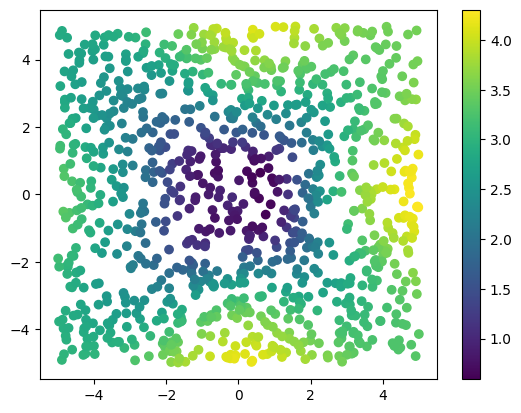

In [49]:
cs2 = []
ths2 = []

for j in range(1000):
    th_point= np.random.uniform(-5,5,2)
    w = miner.morpher.compute_weight(th_point)
    cs2.append(np.sum(w**2))
    ths2.append(th_point)

print(cs2)
ths2 = np.asarray(ths2)
plt.scatter(ths2[:,0],ths2[:,1],c=cs2)
plt.colorbar()
plt.show()

In [50]:
np.asarray(cs2)<1

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

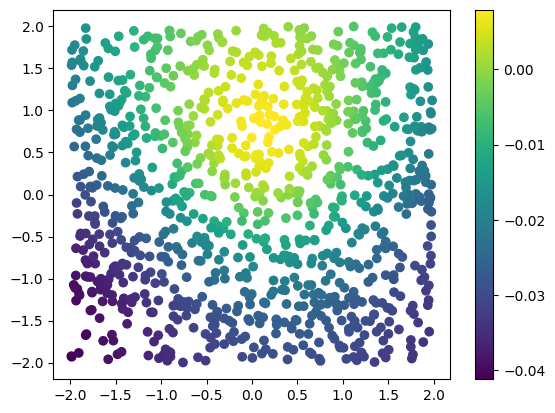

In [63]:
plt.scatter(ths[:,0],ths[:,1],c = cs)
plt.colorbar()

In [61]:
np.mean(-2*np.log(miner.morpher.compute_weight(miner.morpher.basis[1])@evaluated_ratio))

-0.013446654486835597

In [57]:
miner.morpher.basis

array([[ 0.        ,  0.        ],
       [ 1.27226592,  0.06824573],
       [ 0.63514479, -1.28850727],
       [ 0.50501063,  1.31278306],
       [-1.35745378, -1.14972351],
       [-1.41844899,  1.06373048]])

In [56]:
evaluated_ratio[4]

array([0.9850573 , 1.0189714 , 1.0338472 , 1.002593  , 1.0388043 ,
       1.0552574 , 1.0834082 , 1.0195028 , 1.0152348 , 1.0258639 ,
       1.0299119 , 1.0293535 , 1.0312469 , 1.0104461 , 0.9933562 ,
       1.008794  , 1.0021557 , 1.0231518 , 0.97934455, 1.0259378 ,
       1.0311414 , 0.99858826, 1.0064384 , 1.0028281 , 1.0194331 ,
       1.0085759 , 1.08107   , 0.89562577, 1.0227286 , 1.0613    ,
       1.00395   , 1.0519745 , 1.0672063 , 1.0071284 , 1.0353533 ,
       1.0199015 , 1.0247687 , 1.0030508 , 1.0462388 , 1.0070338 ,
       1.0005592 , 1.0175004 , 1.0113399 , 1.0395008 , 1.0079514 ,
       1.0124193 , 1.0232432 , 1.0567311 , 1.0239912 , 0.9977067 ,
       1.0548724 , 0.93253607, 1.011355  , 0.9688113 , 0.9858461 ,
       1.0038172 , 1.0322962 , 1.0180967 , 1.0690999 , 1.0457053 ,
       1.0294499 , 1.0430679 , 1.0342581 , 1.039354  , 1.0093509 ,
       1.0121295 , 1.0058595 , 1.0512408 , 0.98837507, 1.020902  ,
       1.0162212 , 1.0216818 , 1.0449778 , 0.9863551 , 1.05612